In [2]:
import pandas as pd
import numpy as np
import random
from typing import List, Callable
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, minmax_scale, scale
from sklearn.metrics import confusion_matrix, log_loss, mean_squared_error
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from scipy.special import softmax
import seaborn as sns
from sklearn.utils import shuffle
sns.set_palette('husl')

In [3]:
df = pd.read_csv("C:\\Users\\Rohit\\Desktop\\Perturbation Techniques in CNNs\\Perturbation-techniques-in-CNNs\\data\\Iris.csv")

In [4]:
y = df.Species.replace({"Iris-setosa" : 0, "Iris-virginica" : 1, "Iris-versicolor":2})
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: Species, Length: 150, dtype: int64

In [5]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

So we have equal distribution of all the classes.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We have all non-null values so we don't need to perform any value filling operation here.

In [7]:
Xn = df.iloc[:, 1:5]
Xn

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


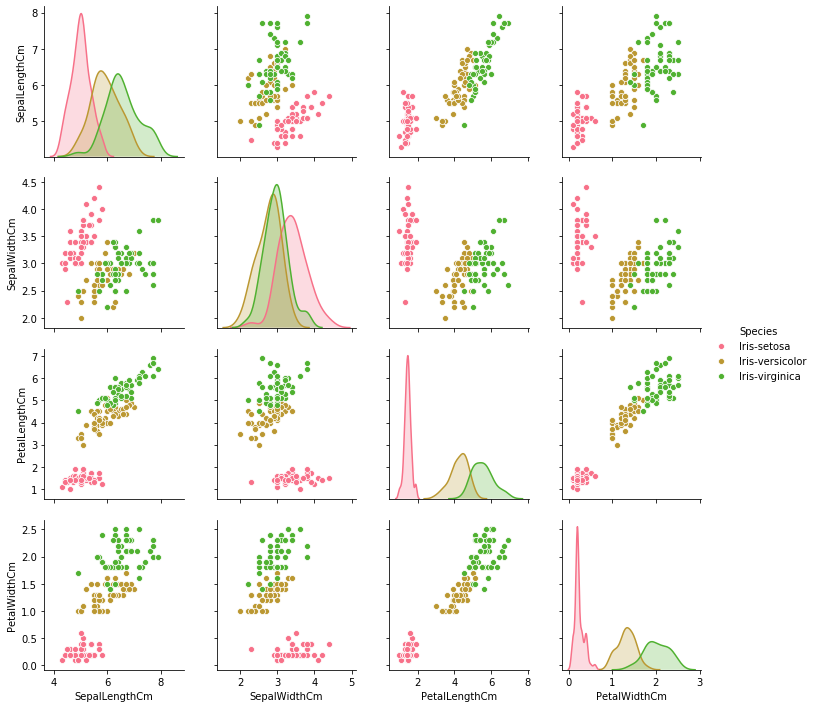

In [8]:
tmp = df.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='o')
plt.show()

In [9]:
#try to take values from 0 to 1 - min  to 0 and max to 1 
#X = normalize(X,norm = 'max' ,axis=1)
#Xn = np.array([[ 1., -1.,  2.],[ 2.,  0.,  0.],[ 0.,  1., -1.]])
X = minmax_scale(Xn, feature_range=(0, 1), copy=False)
#X = scale(Xn)
#X = np.c_[X, np.ones(X.shape[0])]
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

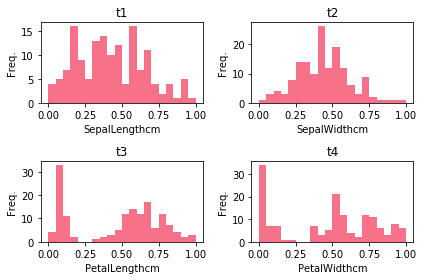

In [10]:
xaxes = ['SepalLengthcm','SepalWidthcm','PetalLengthcm','PetalWidthcm']
yaxes = ['Freq.','Freq.','Freq.','Freq.']
titles = ['t1','t2','t3','t4'] 

f,a = plt.subplots(2,2)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist((X.T)[idx], bins = 20)
    ax.set_title(titles[idx])
    ax.set_xlabel(xaxes[idx])
    ax.set_ylabel(yaxes[idx])
plt.tight_layout()

In [11]:
#!make the ranges same and the frquency axes!!
#!check the weight update with standard BP algo!! the weight uodate might be to big and so it just randomizes the ouput and i the 
#!value is too less that too long for actual update!!!1
#!make a block diagram to show the flow of the ouptuts and values along with the checks and validation for eavh block that u use
#!put each part of the code in a block and each shd have a check for validation!

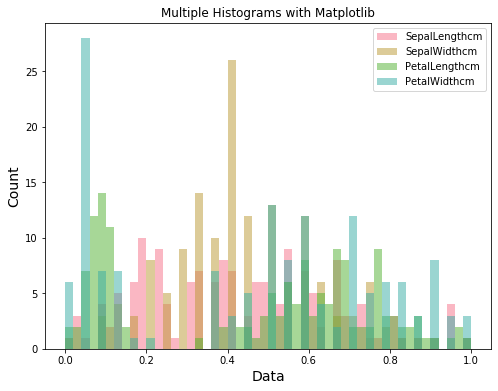

In [12]:
plt.figure(figsize=(8,6))
plt.hist(X[:, 0], bins=50, alpha=0.5, label="SepalLengthcm");
plt.hist(X[:, 1], bins=50, alpha=0.5, label="SepalWidthcm");
plt.hist(X[:, 2], bins=50, alpha=0.5, label="PetalLengthcm");
plt.hist(X[:, 3], bins=50, alpha=0.5, label="PetalWidthcm");

plt.xlabel("Data", size=14)
plt.ylabel("Count", size=14)
plt.title("Multiple Histograms with Matplotlib")
plt.legend(loc='upper right')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#for every class choose a random testing and training subset and then combine so that for ecery class we have the same no 

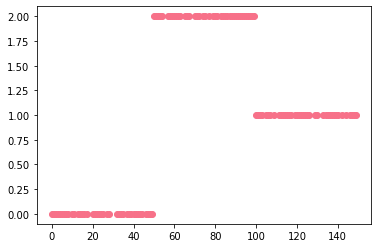

In [14]:
plt.plot(y_train, 'o')

# Implementation of the Back propagation


In [15]:
def params_init():
  #function to initialise the parameters, rand generates a number from 0-1 from a uniform distributon 
  #our hidden layer has 50 neurons
  W1 = np.random.rand(6,4) - 0.5  #W1 is 50*784
  b1 = np.random.rand(6,1) - 0.5    #b1 is 50*1
  W2 = np.random.rand(3,6) - 0.5   #W2 is 10*50
  b2 = np.random.rand(3,1) - 0.5    #b2 is 10*1
  print("Params Initialised")
  return (W1, b1, W2, b2)

def forward(X, W1, b1, W2, b2):
  # print("Entered FP")
  Z1 = np.matmul(W1,X) + b1 #W1 is 6*4, X_train is 4*m, Z1 is 6*m

  A1 = relu(Z1)

  Z2 = np.matmul(W2,A1) + b2 #W2 is 3*6, A1 is 6*m
  # print(np.exp(Z2))
  # print(np.sum(np.exp(Z2)))

  A2 = softmax(Z2) #A2 is 3*m, final predictions
  # print("Fp Done")

  return Z1, A1, Z2, A2


def relu(x):
   return np.maximum(x,0) #max of x and 0

def softmax(Z):
  #softmax function
  return np.exp(Z) / np.sum(np.exp(Z),0)

def relu_d(x):
  #derivative of relu function, 1 if x > 0 otherwise 0
  return x>0


def one_hot_encoding(y):
  #this function one hot encoding of output

  shape = (y.shape[0], 3)
  one_hot = np.zeros(shape)
  rows = np.arange(y.size)
  one_hot[rows, y] = 1
  return one_hot.T

def backprop(Z1, A1, Z2, A2, W1, W2, X, y):
  # print("Entered Backprop")
  m = y.shape[0] #m is the number of training examples
  Y = one_hot_encoding(y)
  #print(Y.shape, m)

  dZ2 = (A2 - Y)  #shape of A2, Y, dZ2 = 10*m

  dW2 = 1/m*np.matmul(dZ2,A1.T) #shape of dZ2 is 10*m, A1 is 50*m, dW2 = 10*50

  db2 = 1/m*np.sum(dZ2) #db1 is 50,1

  
  dZ1 = np.matmul(W2.T, dZ2)*relu_d(Z1) #W2 is 10*50, dZ2 = 10*m, dZ1 = 50*m

  dW1 = 1/m*np.matmul(dZ1,X.T) #shape of dZ1 is 50*m, X is 784*m, dW1 = 50*784

  db1 = 1/m*np.sum(dZ1) #db1 is 50*1

  return dW1, db1, dW2, db2


  


def param_update(W1, b1, W2, b2, dW1, db1, dW2, db2, lr = 0.04):

  #updates the parameters based on backpropogation and decay rate
  #calculate the decay factor
  W1 = W1 - lr*dW1
  b1 = b1 - lr*db1
  W2 = W2 - lr*dW2
  b2 = b2 - lr*db2

  return W1, b1, W2, b2

def batch_grad_descent(X,Y,iter = 100, lr = 0.03, print_op = 100):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []

  W1, b1, W2, b2 = params_init()
  for i in range(iter): #loop over iterations
    for j in range(6): #loop over batches
      # print("Entered for loops in grad descent")
      #total training samples = 120, batch size = 20
      #print(X.shape)
      X1, Y1 = shuffle(X[:, j*20: (j+1)*20 ].T,Y[j*20: (j+1)*20],random_state = 3) #shuffle each batch
      X1 = X1.T #take transpose to match the sizes
      #print(X1.shape)

      Z1, A1, Z2, A2 = forward(X1, W1, b1, W2, b2) 

      dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X1, Y1)

      W1, b1, W2, b2 = param_update(W1, b1, W2, b2, dW1, db1, dW2, db2, lr = lr)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training accuracy
      _,_,_,A2_train = forward(X, W1, b1, W2, b2)
      train_score = accuracy(predictions(A2_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation accuracy
      _,_,_,A2_val = forward(X_test.T, W1, b1, W2, b2)#need to take transpose of X_test cox of shape
      val_score = accuracy(predictions(A2_val), y_test)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(b1)) + np.sum(abs(b2))
      sum_weights.append(sum_w)
      print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, train_acc, val_acc, sum_weights

def grad_descent(X,Y,iter = 100, lr = 0.03, print_op = 100):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []

  W1, b1, W2, b2 = params_init()
  for i in range(iter): #loop over iterations
    #for j in range(6): #loop over batches
    # print("Entered for loops in grad descent")
    #total training samples = 120, batch size = 20
    #print(X.shape)
    X1, Y1 = X, Y #shuffle each batch
    #X1 = X1.T #take transpose to match the sizes
      #print(X1.shape)

    Z1, A1, Z2, A2 = forward(X1, W1, b1, W2, b2) 
    #print(A2.shape)
    #print(Y1.shape)

    dW1, db1, dW2, db2 = backprop(Z1, A1, Z2, A2, W1, W2, X1, Y1)
    print(f"W1 updates {dW1}")

    W1, b1, W2, b2 = param_update(W1, b1, W2, b2, dW1, db1, dW2, db2, lr = lr)

    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training accuracy
      _,_,_,A2_train = forward(X, W1, b1, W2, b2)
      train_score = accuracy(predictions(A2_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')

      ##obtain validation accuracy
      _,_,_,A2_val = forward(X_test.T, W1, b1, W2, b2)#need to take transpose of X_test cox of shape
      val_score = accuracy(predictions(A2_val), y_test)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(b1)) + np.sum(abs(b2))
      sum_weights.append(sum_w)
      print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, train_acc, val_acc, sum_weights

def predictions(A):
  #argmax returns the index of maximum value, we will feed the sigmoid output to this function
  return np.argmax(A,0)

def accuracy(A,Y):
  #this will compare the predicted output to the grounf truth
  return np.sum(A == Y)/Y.shape[0]*100

In [21]:
predictions(np.array([[0, 0.3, 0], [0.1, 0.2, 0.7], [0.9, 0.5, 0.3]]))

array([2, 2, 1], dtype=int64)

In [24]:
mean_squared_error(np.array([0, 0, 0]), predictions(np.array([[0, 0.3, 0], [0.1, 0.2, 0.7], [0.9, 0.5, 0.3]])))

3.0

In [25]:
iter = 6000
print_op = 30

In [26]:
W1, b1, W2, b2, train_acc, val_acc, sum_weights = grad_descent(X_train.T, y_train, iter = iter, lr =  0.5, print_op = print_op)

Params Initialised
W1 updates [[ 0.03385454 -0.0242349   0.0575318   0.05696052]
 [ 0.          0.          0.          0.        ]
 [ 0.02980702  0.00933723  0.040045    0.04260002]
 [ 0.00056457  0.00056106  0.00084231  0.00105213]
 [-0.00158778 -0.00442818 -0.00052655 -0.00036798]
 [-0.02894671 -0.01705376 -0.03612782 -0.03938479]]
W1 updates [[ 0.03000885 -0.03006669  0.05403861  0.0533573 ]
 [ 0.          0.          0.          0.        ]
 [ 0.00607871  0.00218267  0.0080827   0.00881675]
 [ 0.00052608  0.00052274  0.00078494  0.00098059]
 [-0.00216189 -0.00606735 -0.00075203 -0.00050695]
 [-0.02980202 -0.0129132  -0.03879898 -0.04249776]]
W1 updates [[ 0.02807634 -0.03508109  0.05312546  0.05225104]
 [ 0.          0.          0.          0.        ]
 [-0.00720293  0.0007794  -0.01076381 -0.01153312]
 [ 0.00083709  0.00077165  0.00112272  0.001385  ]
 [-0.00285051 -0.0083603  -0.0010623  -0.00076471]
 [-0.02878048 -0.00663767 -0.03964955 -0.04376556]]
W1 updates [[ 0.02702757 -0

Text(0.5, 1.0, 'Accuracy vs Iterations')

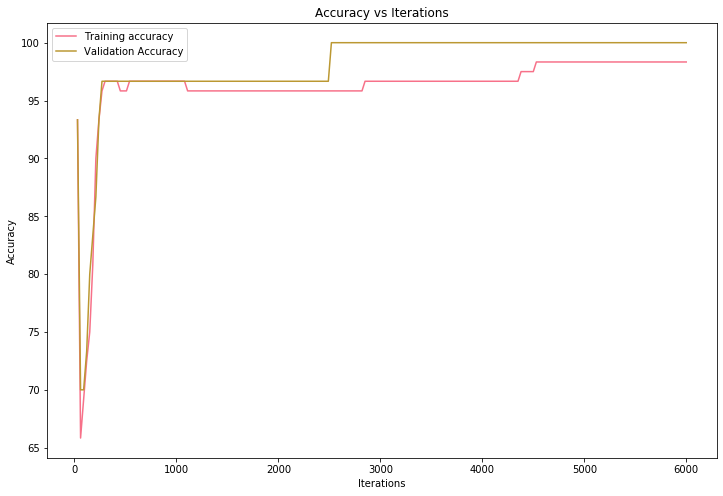

In [27]:
iters = [print_op*i for i in range(1,(iter//print_op)+1)]
plt.figure(figsize = (12,8))
plt.plot(iters, train_acc)
plt.plot(iters, val_acc)
plt.legend(['Training accuracy', 'Validation Accuracy'])
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
# plt.ylim(80,100)
plt.title("Accuracy vs Iterations")

In [30]:
d = np.zeros((2,4))
d

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [31]:
d[1, 1] =  1

In [32]:
d

array([[0., 0., 0., 0.],
       [0., 1., 0., 0.]])

In [51]:
def PerturbW(W, pert, i, j):
  ini = W[i, j]
  W[i, j]+=pert
  assert ini!=W[i,j] , "Weight is not perturbed"
  return W
  
def Perturbb(b, pert, i):
  b[i] += pert
  return b

def mse_loss(y_pred_proba, y_actual):
  #return (1/y_actual.shape[0])*np.sum((predictions(y_pred_proba) - y_actual)**2)
  #print(f"Shapes are {y_actual.shape} and {predictions(y_pred_proba).shape}")
  return mean_squared_error(y_actual, predictions(y_pred_proba))
  

def weight_pert(Z1, A1, Z2, A2, W1, W2, b1, b2, X, y, loss, pert):
  """returns gradients wrt W1"""
  # print("Entered Backprop")
  m = y.shape[0] #m is the number of training examples
  Y = one_hot_encoding(y)
  
  #print(Y.shape, m)
  #taking perturbatons in W1
  #print(f"Initial loss {loss}")
  gradientW1 = np.zeros_like(W1)
  for i in range(W1.shape[0]):
      for j in range(W1.shape[1]):
          Dw1 = PerturbW(W1, pert, i, j)
          _, _, _, A2p = forward(X, Dw1, b1, W2, b2)
          gradientW1[i, j] = (mse_loss(A2p, y)-loss)/pert
          #print(f"Loss at perturb level is {mse_loss(A2p, y)-loss}")
          #print(f"Gradient updates [{i}, {j}] are -{gradientW1[i, j]}")
          #print(f"Loss perturbed W1 is {mse_loss(A2p, y)}\n")
          
  gradientW2 = np.zeros_like(W2)
  for i in range(W2.shape[0]):
      for j in range(W2.shape[1]):
          Dw2 = PerturbW(W2, pert, i, j)
          _, _, _, A2p = forward(X, W1, b1, Dw2, b2)
          gradientW2[i, j] = (mse_loss(A2p, y)-loss)/pert
  
  gradientb1 = np.zeros_like(b1)
  for i in range(b1.shape[0]):
    Db1 = Perturbb(b1, pert, i)
    _, _, _, A2p = forward(X, W1, Db1, W2, b2)
    gradientb1[i] = (mse_loss(A2p, y)-loss)/pert
  gradientb2 = np.zeros_like(b2)
  for i in range(b2.shape[0]):
    Db2 = Perturbb(b2, pert, i)
    _, _, _, A2p = forward(X, W1, b1, W2, Db2)
    gradientb2[i] = (mse_loss(A2p, y)-loss)/pert
    #print("Perturbation complete")
  return gradientW1, gradientb1, gradientW2, gradientb2


def grad_descent_pert(X,Y,pert=0.5, iter = 100, lr = 0.03, print_op = 100):

  # print("Entered Grad Descent")
  #performs minibatch grad descent for given iterations and learning rate
  train_acc = []
  val_acc = []
  sum_weights = []

  W1, b1, W2, b2 = params_init()
  for i in range(iter): #loop over iterations
    #for j in range(6): #loop over batches
    # print("Entered for loops in grad descent")
    #total training samples = 120, batch size = 20
    #print(X.shape)
    X1, Y1 = X, Y #shuffle each batch
    #X1 = X1.T #take transpose to match the sizes
      #print(X1.shape)

    Z1, A1, Z2, A2 = forward(X1, W1, b1, W2, b2) 
    #print(A2.shape)
    #print(Y1.shape)
    loss = mse_loss(A2, Y1)
    dW1, db1, dW2, db2 = weight_pert(Z1, A1, Z2, A2, W1, W2,b1, b2, X1, Y1, loss, pert)

    W1, b1, W2, b2 = param_update(W1, b1, W2, b2, dW1, db1, dW2, db2, lr = lr)
    #print("param updated")
    if (i+1)%(print_op) == 0:
      print(f'Iteration: {i + 1}')

      #obtain training accuracy
      _,_,_,A2_train = forward(X, W1, b1, W2, b2)
      train_score = accuracy(predictions(A2_train), Y)
      train_acc.append(train_score)
      print(f'Train accuracy: {train_score}')
      print(f"Loss: {loss}")

      ##obtain validation accuracy
      _,_,_,A2_val = forward(X_test.T, W1, b1, W2, b2)#need to take transpose of X_test cox of shape
      val_score = accuracy(predictions(A2_val), y_test)
      val_acc.append(val_score)
      print(f'Val accuracy: {val_score}')

      #obtain the sum of weights and append to the sum array
      sum_w = np.sum(abs(W1)) + np.sum(abs(W2)) + np.sum(abs(b1)) + np.sum(abs(b2))
      sum_weights.append(sum_w)
      print(f'Sum of weights: {sum_w}')

  return W1, b1, W2, b2, train_acc, val_acc, sum_weights

In [52]:
W1, b1, W2, b2, train_acc, val_acc, sum_weights = grad_descent_pert(X_train.T, y_train, pert = 0.5, iter = iter, lr =  0.5, print_op = print_op)

Params Initialised


C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true

Iteration: 30
Train accuracy: 33.33333333333333
Loss: 1.6916666666666667
Val accuracy: 33.33333333333333
Sum of weights: 676.0324798836351


C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true_divide
C:\Users\Rohit\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in true

KeyboardInterrupt: 

In [20]:
W1, b1, W2, b2 = params_init()

Params Initialised


In [23]:
W1.shape[1]

4

In [ ]:
Z1, A1, Z2, A2 = forward(X_train.T, W1, b1, W2, b2) 

In [ ]:
mse_loss(A2, y_train)

1.6916666666666667

In [ ]:
np.sum(y**2)/(y.shape[0])

1.6666666666666667

In [ ]:
PerturbW(W1, 1, 0, 0)

AssertionError: 

In [ ]:
def initialise(neuron_no, H):
  """returns a list containing np arrays of weights at each synpase

  Args:
      neuron_no (list): List of integers which represent the number of neurons at each layer
      H (int): The total depth of the neural network

  Returns:
      List: a list containing np arrays of weights at each synpase
  """
  assert len(neuron_no)==H+1
  W = []
  b = []
  for i in range(0, H):
    W.append(np.random.rand(neuron_no[i], neuron_no[i+1]))
    b.append(np.random.rand(neuron_no[i+1]))
  #for i in range(1, H+1):
  #  b.append(np.random.rand(neuron_no[i],1))
  return np.array(W), np.array(b)

In [112]:
Array_Function = Callable[[np.ndarray], np.ndarray]
# A Chain is a list of functions
Chain = List[Array_Function]

In [113]:
def ForwardPass(chain: Chain, W, b, input : np.ndarray, H) -> np.ndarray:
    z1 = input
    for i in range(0, H):
        activation = chain[i]
        #print(z1.shape, W[i].shape, b[i].shape)
        z1 = np.dot(z1, W[i]) + b[i][None, :]
        a1 = activation(z1)
        z1 = a1
    return z1

In [114]:
def relu(x : np.ndarray) -> np.ndarray:
  return np.maximum(0, x)

In [115]:
def sigmoid(x):
 return 1/(1 + np.exp(-x))

In [ ]:
#def softmax(x : np.ndarray) -> np.ndarray:
#  e_x = np.exp(x - np.max(x))
#  return e_x/e_x.sum(axis = 0)

In [ ]:
#(np.zeros((2,)) + 1)

In [117]:
def softmax_up(x : np.ndarray):
    #soft = []
    #print(x.shape)
    #for i in range(0, x.shape[0]):
    #    e_x = np.exp(x[i, :] - np.max(x[i, :]))
    #    soft.append(e_x/np.sum(np.exp(x[i, :])))
    #return np.array(soft)
    return softmax(x, axis = 1)
#use the library fn to compare!!
#fix !

In [ ]:
np.sum(softmax_up(np.array([[5, 4, 2], [4, 2, 8], [4, 4, 1]]))[:, 1])

0.7497802695323786

In [85]:
def ApplyPert(W, pert, k, i,j):
  W[k][i, j] +=pert
  return W

In [86]:
def ApplyPertBias(b, pert, k, i):
    b[k][i] +=pert
    return b

In [157]:
output = ForwardPass(chain, W, b, X_train, H)
output.shape

(120, 3)

In [159]:
loss = len(y_train)*mean_squared_error(y_train, np.argmax(output, axis = 1))
loss

81.0

In [143]:
def train_my_model(N, H,W, b, epochs:int, chain:Chain, X_train:np.ndarray, y_train, X_test:np.ndarray, y_test, pert, lr, reg_lam):
  #W = initialise(N, H)
  loss_arr = []
  loss_test_arr = []
  acc_arr = []
  acc_test_arr = []
  for i in range(0, epochs):
    print("Training EPoch ---- ", i, " -----")
    output = ForwardPass(chain, W, b, X_train, H)
    #loss = cross_entropy(one_hot(np.array(y_train), output.shape[0]), output) + (reg_lam/(2*len(y_train)))*(np.sum(np.array([np.sum(W[i]**2) for i in range(0, H)])))
    
    #loss = log_loss(y_train, output, labels = y_train)/len(y_train)
    loss = len(y_train)*mean_squared_error(y_train, np.argmax(output, axis = 1))
    loss_arr.append(loss)
    #acc_arr.append(accuracy(np.array(y_train) ,output.argsort(axis = 0)[-1, :]))
    acc_arr.append(np.sum(y_train==np.argmax(output, axis = 1)))
    output_test = ForwardPass(chain, W, b, X_test, H)
    #loss_test_arr.append(cross_entropy(one_hot(np.array(y_test), output.shape[0]), output_test))

    #loss_test_arr.append(log_loss(y_test, output_test, labels = y_test)/len(y_test))
    loss_test_arr.append(mean_squared_error(y_test, np.argmax(output_test, axis = 1)))
    #acc_test_arr.append(accuracy(np.array(y_test) ,output_test.argsort(axis = 0)[-1, :]))
    acc_test_arr.append(np.sum(y_test==np.argmax(output_test, axis = 1)))
    print("Loss epoch ", i, " is = ", loss)
    print("---------------------------------")
    gradients, gradients_bias = initialise(N, H)
    for k in range(0,len(W)):
      for i in range(0, W[k].shape[0]):
        for j in range(0, W[k].shape[1]):
          Dw = ApplyPert(W, pert, k, i, j)
          output_pert = ForwardPass(chain, Dw, b, X_train, H)
          #loss_pert = cross_entropy(one_hot(np.array(y_train), output.shape[0]), output_pert)

          #loss_pert = log_loss(y_train, output_pert, labels = y_train)/len(y_train)
          loss_pert = len(y_train)*mean_squared_error(y_train, np.argmax(output_pert, axis = 1))
          #print("Loss perturned is... ", loss_pert)
          grad = (loss_pert - loss)/pert
          gradients[k][i, j] = grad
    for k in range(0, len(b)):
      for i in range(0, b[k].shape[0]):
        bw = ApplyPertBias(b, pert, k, i)
        output_pert = ForwardPass(chain, W, bw, X_train, H)
          #loss_pert = cross_entropy(one_hot(np.array(y_train), output.shape[0]), output_pert)

        #loss_pert = log_loss(y_train, output_pert, labels = y_train)/len(y_train)
        loss_pert = len(y_train)*mean_squared_error(y_train, np.argmax(output_pert, axis = 1))
        grad = (loss_pert - loss)/pert
        gradients_bias[k][i] = grad
    for i in range(0, len(W)):
      W[i] += (-lr*gradients[i])
      print("---------")
      print("Weight update, ", gradients[i])
      print("---------------")
      #W[i] += (lr*gradients[i])
    for i in range(0, len(b)):
      b[i] += (-lr*gradients_bias[i])
  return loss_arr, acc_arr, acc_test_arr, W, output, loss_test_arr, output

In [145]:
output = ForwardPass(chain, W, b, X_train, H)

In [ ]:
np.sum(np.argmax(output, axis = 1)==0)

135

In [ ]:
np.sum(y_train==np.argmax(output, axis = 1))

44

In [ ]:
#check weigth

In [176]:
N = [4,6, 3]
H = len(N)-1
W, b = initialise(N, H)
chain = [sigmoid,softmax_up]

In [177]:
epochs = 6000
lr = 0.05
delta = 0.1
reg_lam = 0.001

In [174]:
W[1]

array([[38.77885282, 28.99816427, 28.49217154],
       [38.99584909, 28.66412302, 28.72231057],
       [39.09874338, 28.84669842, 28.81039465],
       [39.13255012, 28.41053866, 29.09151208],
       [38.80990928, 29.05004742, 28.44281994],
       [38.97679008, 28.36090629, 28.86667781]])

In [178]:
fin_loss, fin_acc, fin_acc_test, fin_W, fin_op, fin_loss_test, out = train_my_model(N, H,W, b,epochs, chain, X_train, y_train, X_test, y_test, delta, lr, reg_lam);

Training EPoch ----  0  -----
Loss epoch  0  is =  201.0
---------------------------------
---------
Weight update,  [[ 30.  70.  70.  70.  70.  80.]
 [ 80.  80. 110.  80.  80.  80.]
 [110. 110. 110. 110. 110. 150.]
 [150. 150. 150. 150. 150. 150.]]
---------------
---------
Weight update,  [[150. 150. 150.]
 [150. 150. 150.]
 [150. 150. 150.]
 [150. 150. 150.]
 [150. 150. 150.]
 [150. 150. 150.]]
---------------
Training EPoch ----  1  -----
Loss epoch  1  is =  203.0
---------------------------------
---------
Weight update,  [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
---------------
---------
Weight update,  [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
---------------
Training EPoch ----  2  -----
Loss epoch  2  is =  203.0
---------------------------------
---------
Weight update,  [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
---------------
---------
Weight update,  [[0. 0

KeyboardInterrupt: 

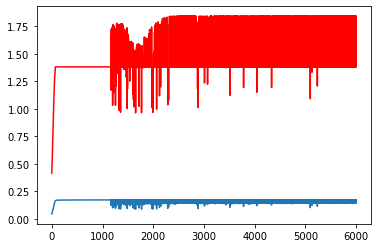

In [ ]:
x = np.arange(epochs)
plt.plot(x, fin_loss)
plt.plot(x, fin_loss_test, "r")

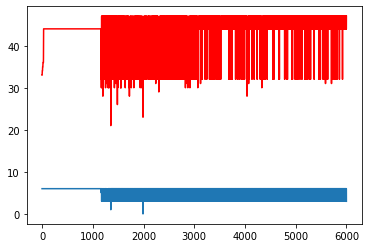

In [ ]:
plt.plot(x, fin_acc, "r")
plt.plot(x, fin_acc_test)

In [ ]:
# Base class
class Layer:
    def __init__(self):
        self.input = None
        self.output = None

    # computes the output Y of a layer for a given input X
    def forward_propagation(self, input):
        raise NotImplementedError

    # computes dE/dX for a given dE/dY (and update parameters if any)
    def weight_perturbation(self, output_error, learning_rate):
        raise NotImplementedError

In [ ]:
#from layer import Layer
import numpy as np

# inherit from base class Layer
class FCLayer(Layer):
    # input_size = number of input neurons
    # output_size = number of output neurons
    def __init__(self, input_size, output_size):
        self.weights = np.random.rand(input_size, output_size) - 0.5
        self.bias = np.random.rand(1, output_size) - 0.5

    # returns output for a given input
    def forward_propagation(self, input_data):
        self.input = input_data
        self.output = np.dot(self.input, self.weights) + self.bias
        return self.output

    # computes dE/dW, dE/dB for a given output_error=dE/dY. Returns input_error=dE/dX.
    def backward_propagation(self, output_error, learning_rate):
        input_error = np.dot(output_error, self.weights.T)
        weights_error = np.dot(self.input.T, output_error)
        # dBias = output_error

        # update parameters
        self.weights -= learning_rate * weights_error
        self.bias -= learning_rate * output_error
        return input_error